### Decision Tree
#### iris 분류

- from sklearn import tree

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size = 0.7, test_size = 0.3, random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [7]:
from sklearn import tree

In [15]:
clf = tree.DecisionTreeClassifier()
clf_dt = clf.fit(x_train, y_train)

In [16]:
y_pred = clf.predict(x_test)
y_pred

array([0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1,
       2])

In [17]:
cfmat = confusion_matrix(y_test, y_pred)
print(cfmat)

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]


In [18]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9333333333333333


In [2]:
# pip install graphviz

In [13]:
import graphviz

In [19]:
dot_data = tree.export_graphviz(clf_dt, out_file = None, 
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled = True, rounded = True)
graph = graphviz.Source(dot_data)

In [21]:
# 만약 그래프를 파일로 저장하고 싶을 경우
dot_data = tree.export_graphviz(clf_dt, out_file = "iris_DT.dot", 
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled = True, rounded = True)
with open("iris_DT.dot") as f:
    dot_graph = f.read

graph = graphviz.Source(dot_data)

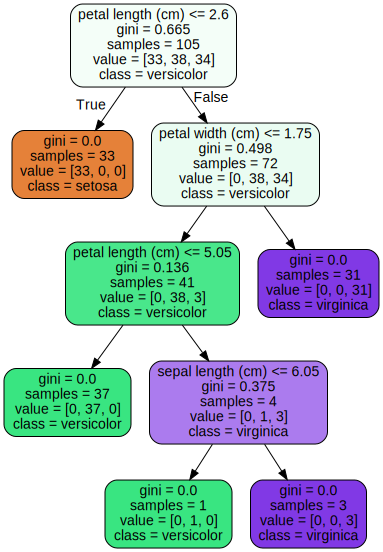

In [20]:
graph

- #### 엔트로피를 활용한 트리

In [22]:
clf2 = tree.DecisionTreeClassifier(criterion = "entropy")

In [24]:
clf2_dt = clf2.fit(x_train, y_train)

y_pred2 = clf2.predict(x_test)

print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
0.9333333333333333


In [28]:
dot_data2 = tree.export_graphviz(clf2_dt, out_file = None, 
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled = True, rounded = True,
                                special_characters = True)
                            
graph2 = graphviz.Source(dot_data2)

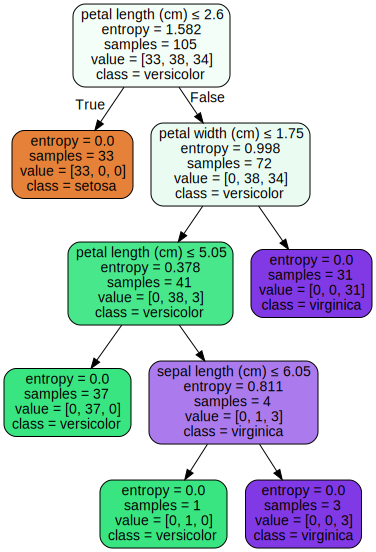

In [29]:
graph2

- #### 프루닝

In [30]:
clf3 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2) # 가지치기

In [31]:
clf3_dt = clf3.fit(x_train, y_train)

y_pred3 = clf3.predict(x_test)

print(confusion_matrix(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
0.9333333333333333


In [33]:
dot_data3 = tree.export_graphviz(clf3_dt, out_file = None, 
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled = True, rounded = True,
                                special_characters = True)
                            
graph3 = graphviz.Source(dot_data3)

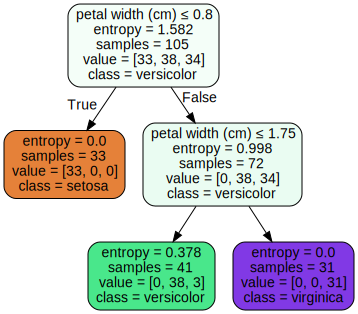

In [34]:
graph3

In [35]:
accuracy_score(iris.target, clf.predict(iris.data))

0.98

In [36]:
accuracy_score(iris.target, clf2.predict(iris.data)) # 엔트로피

0.98

In [37]:
accuracy_score(iris.target, clf3.predict(iris.data)) # 프루닝

0.96